In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import theta.layers as layers
import theta.model as mdl

import warnings
warnings.filterwarnings('ignore')

from theta.costfunctions import mse, crossentropy
from theta.activations import tanh, sigmoid
from theta.initializers import uniform, normal
from theta.gradientschemes import adam, RMSprop, adagrad, adadelta
from theta import minimizer

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer

from scipy import signal


Process PoolWorker-7:
Process PoolWorker-3:
Process PoolWorker-6:
Traceback (most recent call last):
Process PoolWorker-8:
Process PoolWorker-2:
Process PoolWorker-4:
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Process PoolWorker-5:
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  F

# Example 1: Sine-Mixture with gaussian noise

In [2]:
def func(x,n):
    return 0.5*np.sin(1*x+0.1)+0.75*np.sin(0.25*x-0.3)+n*np.random.normal(0,0.2,x.shape[2])

X = np.linspace(0, 100, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

In [ ]:
plt.plot(X.flatten(), Y.flatten(),"ob-")

## via CMA

In [ ]:
M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(1,3, phase=1j))
M.add(layers.DiagExpectationUnitLayer(3,3, phase=1j))
M.add(layers.DiagExpectationUnitLayer(3,1, phase=1j))

#print(M.get_layer(2)._w)

In [ ]:
minim = minimizer.CMA(False)
minim.train(mse, M, X, Y, tolfun=1e-4)

In [ ]:
npoints = 500
test_X = (np.linspace(0, 100, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"b-", label='fit')
plt.legend()

In [ ]:
M.get_layer(3).show_activation(1,10)

## via SGD

Progress: |████████████████████| 100.0% | iteration 20000 in 614.76(s) | cost = 0.048015


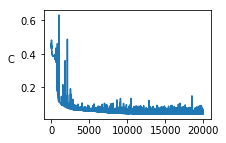

{'cost': array([0.46098192, 0.45778431, 0.45538238, ..., 0.04613871, 0.04723668,
        0.04801522]),
 'iterations': array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 1.9997e+04, 1.9998e+04,
        1.9999e+04])}

In [12]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,3, phase=1))
M.add(layers.DiagExpectationUnitLayer(3,3, phase=1))
M.add(layers.DiagExpectationUnitLayer(3,1, phase=1))

minim = minimizer.SGD()
minim.train(mse, M, X, Y, lr=0.1,scheme=adam(),  maxiter=20000, batch_size=500)

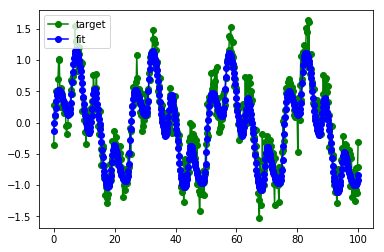

In [13]:
npoints = 500
test_X = (np.linspace(0, 100, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"ob-", label='fit')
plt.legend()

# Example 2: Sine-Cosine-Mixture with trend and gaussian noise

In [ ]:
def func(x,n):
    return 0.02*x+0.5*np.sin(1*x+0.1)+0.75*np.cos(0.25*x-0.3)+n*np.random.normal(0,0.2,x.shape[2])

X = np.linspace(0, 100, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

In [ ]:
Y = func(X[:,None],0).reshape((1,X.shape[1]))

plt.plot(X.flatten(), Y.flatten(),"-")
plt.xlabel("t")
plt.ylabel("y")
#plt.savefig("sincosmix.eps", format="eps")
plt.show()


In [ ]:
Y = func(X[:,None],1).reshape((1,X.shape[1]))

plt.plot(X.flatten(), Y.flatten(),"-")
plt.xlabel("t")
plt.ylabel("y")
#plt.savefig("sincosmix_noise.eps", format="eps")

plt.show()



In [ ]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,3))
M.add(layers.DiagExpectationUnitLayer(3,3))
M.add(layers.DiagExpectationUnitLayer(3,2))
M.add(layers.DiagExpectationUnitLayer(2,1))

In [ ]:
minim = minimizer.CMA(parallel=True)
minim.train(mse, M, X, Y, tolfun=1e-4)

In [ ]:
npoints = 500
test_X = (np.linspace(0, 100, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og", label='train')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"b-", label='fit', linewidth=5)
plt.legend()
plt.xlabel("t")
plt.ylabel("y")
#plt.savefig("sincosmix_10-4.eps", format="eps")
plt.show()

# Example: Intrawave modulation

In [ ]:
def func(x,n):
    return np.cos(0.01*x+0.5*np.cos(0.05*x))/(2+np.sin(0.04*x))

X = np.linspace(0, 1000, 1000)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

plt.plot(X.flatten(), Y.flatten(),"b-")

In [ ]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,5, phase=1j))
M.add(layers.DiagExpectationUnitLayer(5,5, phase=1j))
M.add(layers.DiagExpectationUnitLayer(5,3, phase=1j))
M.add(layers.DiagExpectationUnitLayer(3,1, phase=1j))

In [ ]:
minim = minimizer.CMA(False)
minim.train(mse, M, X, Y, maxiter=1000)

In [ ]:
npoints = 1000
test_X = (np.linspace(0, 1000, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og", label='train')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"b-", label='fit', linewidth=5)
plt.legend()
plt.xlabel("t")
plt.ylabel("y")

# Example 3: Saw-tooth

In [ ]:
def func(x,n):
    return signal.sawtooth(x)

X = np.linspace(0, 30, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

In [ ]:
plt.plot(X.flatten(), Y.flatten(),"ob-")

In [ ]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,10, phase=1j))
M.add(layers.DiagExpectationUnitLayer(10,1, phase=1j))

minim = minimizer.CMA(parallel=False)
minim.train(mse, M, X, Y, maxiter=1000)

In [ ]:
npoints = 500
test_X = (np.linspace(0, 30, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"ob-", label='fit')
#plt.savefig("sawtooth_reg.eps", format="eps")
plt.legend()

# Example 3: MNIST (via CMA)

In [ ]:
# Load MNIST dataset
MNIST_train = pd.read_csv('~/data/mnist_train.csv', delimiter=",",header=None).values
MNIST_test  = pd.read_csv('~/data/mnist_test.csv', delimiter=",",header=None).values

# Prepare data (normalized onto [0,1])
Y_train = MNIST_train[0:10000,0]
X_train = MNIST_train[0:10000,1:]/255.0

Y_test = MNIST_test[:,0]
X_test = MNIST_test[:,1:]/255.0

enc = LabelBinarizer()
enc.fit(np.diag([1,1,1,1,1,1,1,1,1,1]))
enc.classes_ = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
T=enc.transform(Y_train).T


In [ ]:
M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(784,10, param_bound=50))
#M.add(layers.DiagExpectationUnitLayer(10,10))
#M.add(layers.DiagExpectationUnitLayer(10,10))
M.add(layers.SoftMaxLayer(10))

In [ ]:
minim = minimizer.CMA(False)

sol=minim.train(mse(), M, np.transpose(X_train), T, maxiter=100)

In [ ]:
P=np.argmax(M.predict(np.transpose(X_train)),axis=0)

print(classification_report(Y_train,P.T))
print(confusion_matrix(Y_train, P.T))

In [ ]:
P=np.argmax(M.predict(np.transpose(X_test)),axis=0)


print(classification_report(Y_test,P.T))
print(confusion_matrix(Y_test, P.T))

In [ ]:
M.get_layer(1).show_activation(10,1)

# Example 4: MNIST (via SGD)

In [ ]:
M = mdl.Model()

#M.add(layers.NonLinear(784,10,sigmoid()))
M.add(layers.DiagExpectationUnitLayer(784,10, phase=1))
M.add(layers.SoftMaxLayer(10))


In [ ]:
minim = minimizer.SGD()

sol=minim.train(mse, M, np.transpose(X_train), T,lr=0.001, maxiter=100, batch_size=1000)

In [ ]:
P=np.argmax(M.predict(np.transpose(X_train)),axis=0)

print(classification_report(Y_train,P.T))
print(confusion_matrix(Y_train, P.T))

In [ ]:
P=np.argmax(M.predict(np.transpose(X_test)),axis=0)


print(classification_report(Y_test,P.T))
print(confusion_matrix(Y_test, P.T))

In [ ]:
M.get_layer(1).show_activation(10,10)